# Expanding Intervals

In [53]:
import pystare
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import numpy

In [97]:
sids = numpy.array([2521902129312956427, 2521902404190863371, 2521899930289700875,
       2521900067728654347, 2521900205167607819, 2521991876949573643,
       2521992701583294475, 2521992839022247947, 2521992976461201419,
       2521997099629805579, 2521889484929237003, 2521991739510620171,
       2521902679068770315, 2521908726382723083, 2521894432731561995,
       2521901579557142539, 2521989952804225035, 2521990365121085451,
       2521991327193759755, 2521997237068759051, 2521997511946665995,
       2521898418461212683, 2521898555900166155, 2521898693339119627,
       2521889759807143947, 2521903091385630731, 2521901716996096011,
       2521897456388538379, 2521902266751909899, 2521897868705398795,
       2521898968217026571, 2521990227682131979, 2521889622368190475,
       2521901167240282123, 2521887973100748811, 2521902816507723787,
       2521892920903073803, 2521894020414701579, 2521890721879818251,
       2521993526217015307, 2521901304679235595, 2521901854435049483,
       2521902953946677259, 2521898006144352267, 2521890859318771723,
       2521886461272260619, 2521888110539702283, 2521898830778073099,
       2521903228824584203, 2521897044071677963, 2521903366263537675,
       2521899105655980043, 2521903503702491147, 2521886048955400203,
       2521991602071666699, 2521899380533886987, 2521890584440864779,
       2521992014388527115, 2521886873589121035, 2521887011028074507,
       2521889347490283531, 2521890447001911307, 2521886736150167563,
       2521893745536794635, 2521893882975748107, 2521894157853655051,
       2521897181510631435, 2521897731266445323, 2521899792850747403,
       2521887698222841867, 2521900892362375179, 2521901442118189067,
       2521906389920514059, 2521908588943769611, 2521901991874002955,
       2521902541629816843, 2521909001260630027, 2521989540487364619,
       2521897318949584907, 2521898143583305739, 2521898281022259211,
       2521897593827491851, 2521993113900154891, 2521993251339108363,
       2521993388778061835, 2521993663655968779, 2521886598711214091,
       2521886186394353675])

expanded_stare_test = numpy.array([0x22ff8a000000000b, 0x22ff8a200000000b,
        0x22ff8a600000000b, 0x22ff8a800000000b,0x22ff8aa00000000b,
        0x22ff8ac00000000b,0x22ff8ae00000000b,0x22ff8b800000000b,
        0x22ff8bc00000000b,0x22ff8be00000000b,0x22ff8d000000000a,
        0x22ff8e000000000a,0x22ff90400000000b,0x22ff91000000000a,
        0x22ff91a00000000b,0x22ff940000000009,0x22ff96200000000b,
        0x22ff96800000000a,0x22ff97800000000b,0x22ff97c00000000b,
        0x22ff97e00000000b,0x22ff980000000009,0x22ff9c800000000b,
        0x22ff9e800000000b,0x22ff9ea00000000b,0x22ff9ee00000000b,
        0x22ffe8200000000b,0x22ffe8800000000b,0x22ffe8c00000000b,
        0x22ffe8e00000000b,0x22ffe9c00000000b,0x22ffea000000000a,
        0x22ffeb000000000a,0x22ffeb800000000a,0x22ffef000000000b,
        0x22ffef200000000b,0x22ffef600000000b
        ])

In [114]:
compressed = pystare.to_compressed_range(sids)
expanded = pystare.expand_intervals(compressed, -1, False)    
expanded_wrong = pystare.expand_intervals(compressed, -1, True)    

In [115]:
def sids2triang(sids):
    lons, lats, intmat = pystare.triangulate_indices(sids)
    return tri.Triangulation(lons, lats, intmat)

Text(0.5, 1.0, 'Expanded SIDs (correct)')

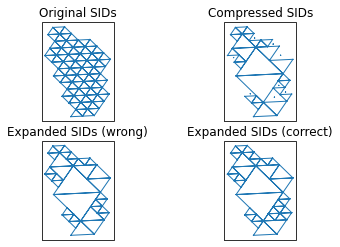

In [118]:
proj   = ccrs.PlateCarree()
transf = ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=2,ncols=2,subplot_kw={'projection':proj,'transform':transf})

triang = sids2triang(sids)
ax[0, 0].triplot(triang, '-',transform=transf, lw=1)    
ax[0, 0].set_title('Original SIDs')

triang = sids2triang(compressed)
ax[0, 1].triplot(triang, '-',transform=transf, lw=1)    
ax[0, 1].set_title('Compressed SIDs')

triang = sids2triang(expanded_wrong)
ax[1, 0].triplot(triang, '-',transform=transf, lw=1)    
ax[1, 0].set_title('Expanded SIDs (wrong)')

triang = sids2triang(expanded)
ax[1,1].triplot(triang, '-',transform=transf, lw=1)    
ax[1, 1].set_title('Expanded SIDs (correct)')